## 1. Write a program to classification breast cancer dataset using a single layer perceptron model. Evaluations should be in the form of F-1 score, Accuracy and ROC Curve (You can use sklearn for all evaluation metrics).

In [1]:
# for supressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# sklearn imports
from sklearn.datasets import load_breast_cancer, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

In [161]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [162]:
df.shape

(569, 33)

In [163]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [164]:
df.iloc[:, 0].replace('M', 1, inplace=True)
df.iloc[:, 0].replace('B', 0, inplace=True)
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [165]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0].values

In [166]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [168]:
def activation(x, derivative=False):
    x[x <= 0.5] = 0
    x[x > 0.5] = 1
    return x

In [169]:
def train(X, y, epochs=100, alpha=0.1):
    weights = np.random.uniform(size=(X.shape[1] + 1, 1))
    y = y.reshape(y.shape[0], 1)
    X = np.c_[np.ones(X.shape[0]), X]
    for i in range(epochs):
        predicted_output = activation(X @ weights)
        error = y - predicted_output
        d_pred_output = alpha * error
        weights += X.T @ d_pred_output
    return weights

In [170]:
def predict(X, weights):
    return activation(X @ weights[1:, :] + weights[0, :])

In [171]:
weights = train(X_train, y_train, epochs=1000, alpha=0.01)
y_pred = predict(X_test, weights)
print("\nTesting Accuracy: ", accuracy_score(y_test, y_pred) * 100, "%", sep='')
print("\nTraining Accuracy: ", accuracy_score(y_train, predict(X_train, weights)) * 100, "%", sep='')


Testing Accuracy: 98.83040935672514%

Training Accuracy: 98.49246231155779%


In [172]:
f1_score(y_test, y_pred)

0.9838709677419354

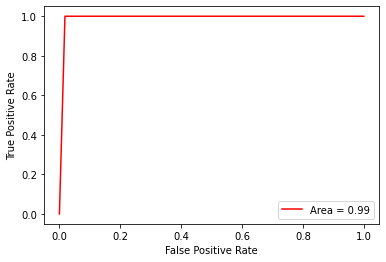

In [173]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, "r", label = 'Area = {:0.2f}'.format(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## 2.Implement a two-layer perceptron (input, hidden, output) with the back propagation algorithm to classify MNIST dataset. This dataset contains the pictures of numbers from ‘0’ to ‘9’ and their labels. Vary the number of hidden neurons in the hidden layer and observe their effect on accuracy. You can use function from sklearn to implement it. Encode the output using one- hot encoder. Normalize the dataset before passing it to neural-network. Evaluations should be in the form of F-1 score, Accuracy and ROC Curve (You can use sklearn for all evaluation metrics)

In [175]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X /= 255
y = y.astype(int)
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [177]:
mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=10, alpha=0.001, solver='sgd', verbose=True, learning_rate_init=0.01).fit(X_train, y_train)


Iteration 1, loss = 1.97072719
Iteration 2, loss = 1.04414306
Iteration 3, loss = 0.93716015
Iteration 4, loss = 0.87932925
Iteration 5, loss = 0.83143589
Iteration 6, loss = 0.78314803
Iteration 7, loss = 0.73403395
Iteration 8, loss = 0.69406830
Iteration 9, loss = 0.66420035
Iteration 10, loss = 0.63878125


In [178]:
print("Training Accuracy: ", mlp.score(X_train, y_train))

Training Accuracy:  0.8426012793176972


In [179]:
mlp.fit(X_test, y_test)
print("Testing Accuracy: ", mlp.score(X_test, y_test))


Iteration 1, loss = 2.37319902
Iteration 2, loss = 1.08828638
Iteration 3, loss = 0.88508774
Iteration 4, loss = 0.80572952
Iteration 5, loss = 0.76146386
Iteration 6, loss = 0.73207707
Iteration 7, loss = 0.70905862
Iteration 8, loss = 0.69161102
Iteration 9, loss = 0.67669245
Iteration 10, loss = 0.66377774
Testing Accuracy:  0.8285714285714286


In [180]:
y_pred = mlp.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.8868503090183545

In [181]:
def roc_plot_multi(y_pred,y_test):
    n = 10
    fpr, tpr, roc_auc = dict(), dict(), dict()
    
    for i in range(n):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i, color in zip(range(n), list(['blue', 'red', 'green', '#f542d7', '#a742f5', 'cyan', 'yellow', 'black', '#FFA500', '#BC8F8F'])):
        plt.plot(fpr[i], tpr[i], color=color, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

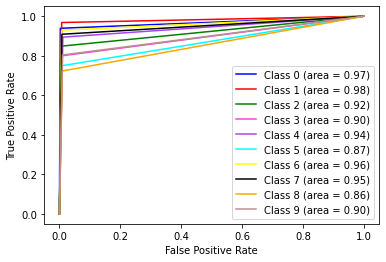

In [182]:
roc_plot_multi(y_pred, y_test)